# **Import Libraries and modules**

In [ ]:
from keras.datasets import mnist 
import tensorflow as tf
from keras import backend
import seaborn as sns
import numpy as np
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D,SeparableConv2D
from keras.utils import np_utils
from keras import optimizers

from keras.datasets import mnist

In [ ]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# here we are having a class number for each image
from keras import utils as np_utils
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])
X_train = X_train.reshape((-1, 28, 28, 1))

print(X_train.shape)

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 28, 28, 1)


In [ ]:


model = Sequential()

 
model.add(Convolution2D(8, (3,3),activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(SeparableConv2D(32, 3, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Convolution2D(8,1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(SeparableConv2D(16, 3, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(SeparableConv2D(32, 3, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(SeparableConv2D(64, 3, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(SeparableConv2D(128, 2, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(8,1))
model.add(Convolution2D(16,2))
model.add(BatchNormalization(axis=-1))
model.add(Convolution2D(10,1))
model.add(Flatten())
model.add(Activation('softmax'))

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 22, 22, 32)        688       
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 8)         264       
__________

In [ ]:
opt=optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 64s 1ms/step - loss: 0.8888 - acc: 0.7505 - val_loss: 0.3569 - val_acc: 0.9215
Epoch 2/50
60000/60000 [==============================] - 50s 827us/step - loss: 0.2990 - acc: 0.9304 - val_loss: 0.1792 - val_acc: 0.9583
Epoch 3/50
60000/60000 [==============================] - 51s 842us/step - loss: 0.1727 - acc: 0.9577 - val_loss: 0.1165 - val_acc: 0.9710
Epoch 4/50
60000/60000 [==============================] - 52s 862us/step - loss: 0.1208 - acc: 0.9687 - val_loss: 0.0861 - val_acc: 0.9779
Epoch 5/50
60000/60000 [==============================] - 54s 895us/step - loss: 0.0936 - acc: 0.9746 - val_loss: 0.0711 - val_acc: 0.9812
Epoch 6/50
60000/60000 [==============================] - 50s 839us/step - loss: 0.0770 - acc: 0.9787 - val_loss: 0.0622 - val_acc: 0.9834
Epoch 7/50
60000/60000

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.04264953793902096
Test accuracy: 0.9874


<IPython.core.display.Javascript object>


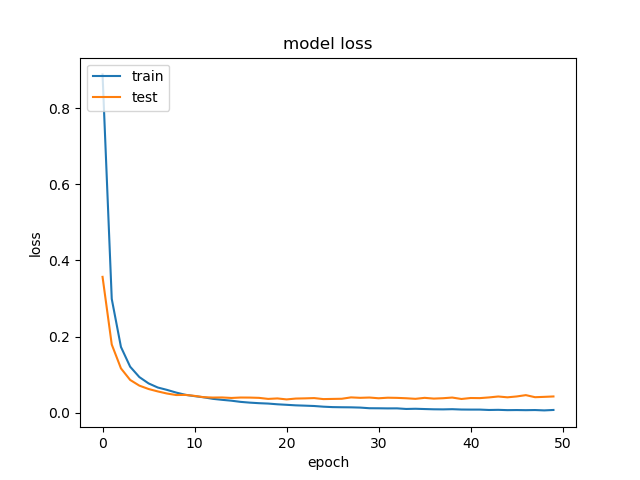

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:


model2 = Sequential()

 
model2.add(Convolution2D(8, 3,activation='relu', input_shape=(28,28,1)))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Convolution2D(16, 3, activation='relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Convolution2D(32, 3, activation='relu'))
model2.add(Dropout(0.3))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())

model2.add(Dense(30, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model2.add(Dense(10, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model2.add(Activation('softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [ ]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 16)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 11, 11, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
__________

In [ ]:
opt=optimizers.Adam(lr=0.0001)
model2.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

In [ ]:
history2 = model2.fit(X_train, Y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 22s 363us/step - loss: 1.4108 - acc: 0.5721 - val_loss: 0.9785 - val_acc: 0.7414
Epoch 2/50
60000/60000 [==============================] - 23s 379us/step - loss: 0.8175 - acc: 0.7501 - val_loss: 0.7734 - val_acc: 0.8153
Epoch 3/50
60000/60000 [==============================] - 25s 419us/step - loss: 0.7252 - acc: 0.7954 - val_loss: 0.7070 - val_acc: 0.8387
Epoch 4/50
60000/60000 [==============================] - 25s 413us/step - loss: 0.6803 - acc: 0.8180 - val_loss: 0.6660 - val_acc: 0.8502
Epoch 5/50
60000/60000 [==============================] - 25s 419us/step - loss: 0.6528 - acc: 0.8303 - val_loss: 0.6389 - val_acc: 0.8577
Epoch 6/50
60000/60000 [==============================] - 26s 438us/step - loss: 0.6368 - acc: 0.8364 - val_loss: 0.6169 - val_acc: 0.8612
Epoch 7/50
60000/60000 [==============================] - 25s 412us/step - loss: 0.6203 - acc: 0.8432 - val_loss: 0.

In [ ]:
score = model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.5126468414783478
Test accuracy: 0.8859


<IPython.core.display.Javascript object>


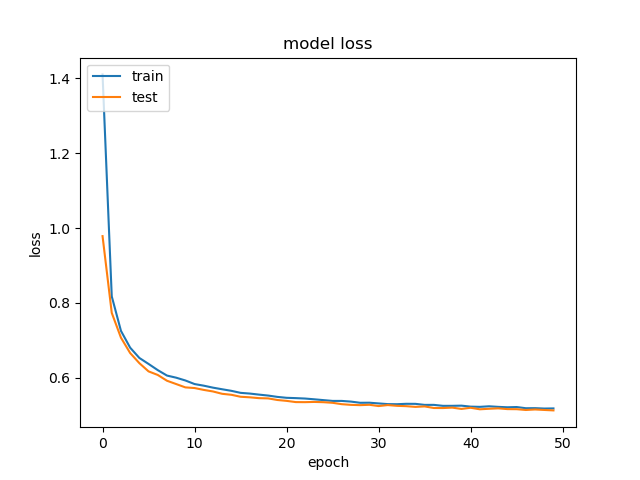

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:


model3 = Sequential()

 
model3.add(Convolution2D(8, 3,activation='relu', input_shape=(28,28,1)))
model3.add(BatchNormalization(axis=-1))

model3.add(Convolution2D(16, 3, activation='relu'))
model3.add(BatchNormalization(axis=-1))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Convolution2D(32, 3, activation='relu'))
model3.add(BatchNormalization(axis=-1))

model3.add(Convolution2D(64, 3, activation='relu'))
model3.add(BatchNormalization(axis=-1))

model3.add(Convolution2D(128, 3, activation='relu'))
model3.add(BatchNormalization(axis=-1))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Flatten())

model3.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model3.add(Dense(10, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model3.add(Activation('softmax'))

In [ ]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_16 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_17 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 10, 10, 32)        4640      
_________________________________________________________________
batch_normalization_18 (Batc (None, 10, 10, 32)        128       
__________

In [ ]:
opt=optimizers.Adam(lr=0.0001)

model3.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

In [ ]:
history3 = model3.fit(X_train, Y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 48s 796us/step - loss: 0.7781 - acc: 0.7294 - val_loss: 0.5211 - val_acc: 0.7912
Epoch 2/20
60000/60000 [==============================] - 43s 716us/step - loss: 0.5028 - acc: 0.7954 - val_loss: 0.4964 - val_acc: 0.7953
Epoch 3/20
60000/60000 [==============================] - 42s 693us/step - loss: 0.4810 - acc: 0.7996 - val_loss: 0.4871 - val_acc: 0.7970
Epoch 4/20
60000/60000 [==============================] - 42s 705us/step - loss: 0.4696 - acc: 0.8016 - val_loss: 0.4838 - val_acc: 0.7963
Epoch 5/20
60000/60000 [==============================] - 45s 743us/step - loss: 0.4624 - acc: 0.8029 - val_loss: 0.4800 - val_acc: 0.7978
Epoch 6/20
60000/60000 [==============================] - 44s 741us/step - loss: 0.4572 - acc: 0.8039 - val_loss: 0.4813 - val_acc: 0.7965
Epoch 7/20
60000/60000 [==============================] - 45s 748us/step - loss: 0.4547 - acc: 0.8044 - val_loss: 0.

In [ ]:
score = model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.48252001395225524
Test accuracy: 0.7986


<IPython.core.display.Javascript object>


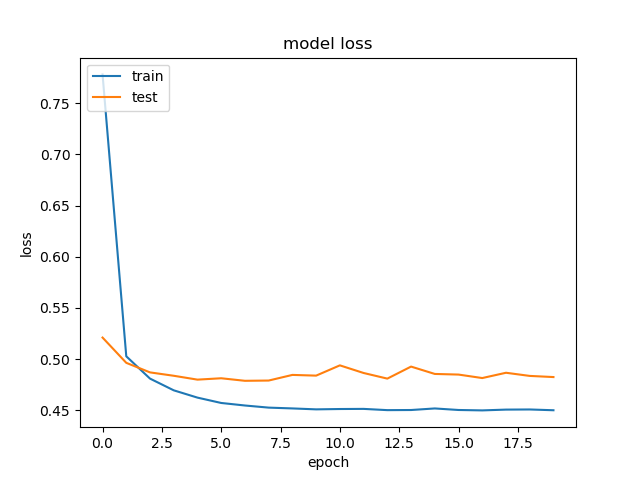

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["S no.", "Model Description", "Accuracy", "Score"]

x.add_row(["1"," 11 layer Separable Conv with Receptive field of 28X28 "," 98.74", "0.0426"])
x.add_row(["2"," 3 layer Conv followed BN and Maxpool with dropouts", "88.59", "0.2693"])
x.add_row(["3", "5 layers COnv and Maxpool", "79.86", "0.4825"])
print(x)

+-------+---------------------------------------------------------+----------+--------+
| S no. |                    Model Description                    | Accuracy | Score  |
+-------+---------------------------------------------------------+----------+--------+
|   1   |  11 layer Separable Conv with Receptive field of 28X28  |   98.74  | 0.0426 |
|   2   |    3 layer Conv followed BN and Maxpool with dropouts   |  88.59   | 0.2693 |
|   3   |                5 layers COnv and Maxpool                |  79.86   | 0.4825 |
+-------+---------------------------------------------------------+----------+--------+
